In [1]:
import numpy as np
import numpy.linalg as LA
from scipy import integrate
import matplotlib.pyplot as plt

## Метод колокації

Маємо інтегральне рівняння вигляду

$$
\dots
$$

Наближений розв'язок будемо шукати у вигляді

 $$
 \tilde{\psi_k}(x)=\sum_{j=1}^{n} c^{(k)}_{j} \gamma^{(k)}_{j}(x), \quad k = 1,2
 $$

де $c_j$ - невідомі константи, які потрібно знайти, а $\gamma_j$ - задані лінійнонезалежні функції (в нашому випадку кусково аналітичні), $j = 1, ..., n$.

Розглянувши його на множині точок $x_i$, таких, що
$$
a \leqslant x_{1}<x_{2}<\ldots<x_{m} \leqslant b
$$

отримаємо СЛАР відносно невідомих $с^{(k)}_j$, $j = 1, ..., n$. 

 $$
 A =
 \begin{pmatrix}
	 \begin{matrix}
	 	G^{(1)}_{11} & \dots  & G^{(1)}_{1n} \\
	 	\vdots 		 & \ddots & \\
	 	G^{(1)}_{n1} & 		  & G^{(1)}_{nn} \\
	 \end{matrix} &
	 \begin{matrix}
	 	G^{(2)}_{11} & \dots  & G^{(2)}_{1n} \\
	 	\vdots 		 & \ddots & \\
	 	G^{(2)}_{n1} & 		  & G^{(2)}_{nn} \\
	 \end{matrix} \\
	 \begin{matrix}
		G^{(3)}_{11} & \dots  & G^{(3)}_{1n} \\
		\vdots 		 & \ddots & \\
		G^{(3)}_{n1} & 		  & G^{(3)}_{nn} \\
	 \end{matrix} &
	 \begin{matrix}
		G^{(4)}_{11} & \dots  & G^{(4)}_{1n} \\
		\vdots 		 & \ddots & \\
		G^{(4)}_{n1} & 		  & G^{(4)}_{nn} \\
	 \end{matrix} \\
 \end{pmatrix}
 c = 
 \begin{pmatrix}
	c^{(1)}_1\\
	\vdots\\
	c^{(1)}_n\\
	c^{(2)}_1\\
	\vdots\\
	c^{(2)}_n\\
 \end{pmatrix}
 g = 
 \begin{pmatrix}
	2\pi g_1(x_1)\\
	\vdots\\
	2\pi g_1(x_n)\\
	2\pi g_2(x_1)\\
	\vdots\\
	2\pi g_2(x_n)\\
 \end{pmatrix}
 $$

For the full discretization of the integral equation of the first kind $(3.5),$ which has a logarithmic singularity, we apply a quadrature method together with the quadrature rule [13,14] based on trigonometric interpolation. For this purpose, we choose an equidistant mesh by setting $t_{i}:=i \pi / M, i=0, \ldots, 2 M-1, M \in \mathbb{N}$ and use the quadrature rules
 $$
 \begin{array}{c}
 	\frac{1}{2 \pi} \int_{0}^{2 \pi} f(\tau) d \tau \approx \frac{1}{2 M} \sum_{j=0}^{2 M-1} f\left(t_{j}\right) \\
 	 \int_{0}^{2 \pi} f(\tau) \ln \left(\frac{4}{e} \sin ^{2} \frac{t-\tau}{2}\right) d \tau \approx {2 \pi}\sum_{j=0}^{2 M-1} R_{j}(t) f\left(t_{j}\right)
 \end{array}
 $$
 with known weight functions $R_{j}$ (see [13]).
 
 $$
 R_{j}(t)=-\frac{1}{n} \sum_{m=1}^{n-1} \frac{1}{m} \cos m\left(t-t_{j}\right)+\frac{1}{2 n} \cos n\left(t-t_{j}\right)
 $$
 

In [2]:
a, b = 0, 2*np.pi

x1 = lambda t: (np.cos(t), np.sin(t))
x2 = lambda t: (2*np.cos(t), 2*np.sin(t))
dx1 = lambda t: (-np.sin(t), np.cos(t))
dx2 = lambda t: (-2*np.sin(t), 2*np.cos(t))
ddx2 = lambda t: (-2*np.cos(t), -2*np.sin(t))

g1 = lambda x: 1
g2 = lambda x: 0

u = lambda x, y : 1

n = 10

In [3]:
# a, b = 0, 2*np.pi

# x1 = lambda t: (0.9*np.cos(t), 0.9*np.sin(t))
# x2 = lambda t: (2*np.cos(t), 2*np.sin(t))
# dx1 = lambda t: (-0.9*np.sin(t), 0.9*np.cos(t))
# dx2 = lambda t: (-2*np.sin(t), 2*np.cos(t))
# ddx2 = lambda t: (-2*np.cos(t), -2*np.sin(t))

# g1 = lambda t: x1(t)**2 
# g2 = lambda t: 0

# def g1(t):
#     x, y = x1(t)
#     return x**2 - y**2

# def g2(t):
#     x, y = x2(t)
#     v = np.array([dx2(t)[1], -dx2(t)[0]]) / LA.norm(dx2(t))
#     grad = np.array([2*x, 2*y])
    
#     return np.dot(grad, v)

# u = lambda x, y : x**2 - y**2

# n = 10

$$
K_{1}(t, \tau)=\frac{\left(\bar{x}_{1}(\tau)-\bar{x}_{2}(t), \bar{\nu}\left(x_{2}(t)\right)\right)}{\left|x_{2}(t)-x_{1}(\tau)\right|^{2}}
$$
$$
K_{2}(t, \tau)=\left\{\begin{array}{l}
\frac{\left(\bar{x}_{2}(\tau)-\bar{x}_{2}(t), \bar{\nu}\left(x_{2}(t)\right)\right)}{\left|x_{2}(t)-x_{2}(\tau)\right|^{2}}, \quad \text { Якщо } t \neq \tau \\
\frac{\left(\bar{x}_{2}^{\prime \prime}(t), \bar{\nu}\left(x_{2}(t)\right)\right)}{2\left|x_{2}^{\prime}(t)\right|^{2}}, \quad \text { якщо } t=\tau
\end{array}\right.
$$


In [4]:
nu_x2 = lambda t: np.array([dx2(t)[1], -dx2(t)[0]]) / LA.norm(dx2(t))

K11_1 = lambda t, tau: -1/2

def K11_2(t, tau):
  if np.abs(t - tau) > 1e-10: #np.isclose(t, tau):
    return 1/2*np.log( 4/np.e * np.sin((t - tau)/2)**2 \
                 / LA.norm(np.subtract(x1(t), x1(tau)))**2)
  else:
    return 1/2*np.log(1/(np.e * LA.norm(dx1(t))**2))

K12 = lambda t, tau: np.log(1/(LA.norm(np.subtract(x1(t), x2(tau)))))

K21 = lambda t, tau: np.dot(np.subtract(x1(tau), x2(t)), nu_x2(t)) / LA.norm(np.subtract(x2(t), x1(tau)))**2


def K22(t, tau):    
    if np.abs(t - tau) > 1e-10:
        return np.dot(np.subtract(x2(tau), x2(t)), nu_x2(t)) / LA.norm(np.subtract(x2(t), x2(tau)))**2
    else:
        return np.dot(ddx2(t), nu_x2(t)) / ((2*LA.norm(dx2(t)))**2)


In [5]:
# xx = np.linspace(a, b, n).tolist()

h = (b - a) / (n)
xx = [ h * i for i in range(n)]

In [6]:
def basicFunction(j, x, xx=xx, h=h):
    n = len(xx) - 1 ## TODO

    if j >=1 and xx[j-1] <= x <= xx[j]:
        return (x - xx[j-1])/h
    elif j <= n-1 and xx[j] <= x <= xx[j+1]:
        return (xx[j+1] - x)/h
    else:
        return 0

In [7]:
def quadrature_with_ln_special_case(f, M=100):
    '''integral from 0 to 2pi'''

    tt = [i*np.pi/M for i in range(2*M)]

    R = lambda i, t: -1/(2*M) * (1 + 2*sum([(1/m) * np.cos(m * (t - tt[i]))
                                             for m in range(1, M)]) + 1/M * np.cos(t - tt[i]))
      
    #sum([1/m* np.cos(m*(t - tt[i])) + 1/(2*n)*np.cos(n*(t - tt[i]))
    #                            for m in range(1, M)])
  
    def integral(t):
        return sum([R(j,t)*f(tt[j]) for j in range(2*M)])
  
    return integral

$$
G^{(1)}_{ji} = \int_{0}^{2\pi} \gamma^{(1)}_{j}(\tau) K_{11}(t_i, \tau) d \tau
$$

In [8]:
G1 = np.zeros((n,n)).tolist()
for i in range(n):
  for j in range(n):
    K_1 = quadrature_with_ln_special_case(lambda s: K11_1(xx[i], s)*basicFunction(j, s))(xx[i])

    (K_2, err) = integrate.quad(lambda s: K11_2(xx[i], s)*basicFunction(j, s), a, b)

    
    G1[i][j] = K_1 + K_2

$$
G^{(2)}_{ji} = \int_{0}^{2\pi} \gamma^{(2)}_{j}(\tau) K_{12}(t_i, \tau) d \tau
$$

In [9]:
G2 = np.zeros((n,n)).tolist()
for i in range(n):
  for j in range(n):
    
    Kxi_li= lambda s: K12(xx[i], s) * basicFunction(j, s)
    
    (integral, err) = integrate.quad(Kxi_li, a, b)
    
    G2[i][j] = integral

$$
G^{(3)}_{ji} = \int_{0}^{2\pi} \gamma^{(1)}_{j}(\tau) K_{21}(t_i, \tau) d \tau
$$

In [10]:
G3 = np.zeros((n,n)).tolist()
for i in range(n):
  for j in range(n):
    
    Kxi_li= lambda s: K21(xx[i], s) * basicFunction(j, s)
    
    (integral, err) = integrate.quad(Kxi_li, a, b)
    
    G3[i][j] = integral

$$
G^{(4)}_{ji} = -\pi\frac{\gamma^{(2)}_{j}(t_i)}{|x'_{2}(t_i))|}
				 + \int_{0}^{2\pi} \gamma^{(2)}_{j}(\tau) K_{22}(t_i, \tau) d \tau
$$

In [11]:
G4 = np.zeros((n,n)).tolist()
for i in range(n):
  for j in range(n):
    
    Kxi_li= lambda s: K22(xx[i], s) * basicFunction(j, s)
    
    (integral, err) = integrate.quad(Kxi_li, a, b)
    
    G4[i][j] = integral - np.pi * basicFunction(j, xx[i]) / LA.norm(dx2(xx[i]))

In [12]:
A = np.concatenate((np.concatenate((G1, G2), axis=1),
                    np.concatenate((G3, G4), axis=1)), axis=0)
A.shape

(20, 20)

In [13]:
g = np.concatenate(([[g1(xx[j])] for j in range(n)],
                    [[g2(xx[j])] for j in range(n)]))
g.shape

(20, 1)

In [31]:
G4

[[-1.6493361431346156,
  -0.1570796325760569,
  -0.15707963267948963,
  -0.1570796326794897,
  -0.15707963257605703,
  -0.1570796326794896,
  -0.15707963257605698,
  -0.15707963267948968,
  -0.1570796326794897,
  -0.07853981633974484],
 [-0.07853981633974494,
  -1.7278759594744213,
  -0.1570796326794899,
  -0.15707963267948966,
  -0.15707963257605692,
  -0.15707963267948966,
  -0.15707963257605692,
  -0.15707963267948968,
  -0.1570796326794897,
  -0.07853981633974481],
 [-0.0785398163397448,
  -0.1570796326794895,
  -1.7278759594743776,
  -0.15707963267948954,
  -0.1570796325760569,
  -0.15707963267948974,
  -0.1570796326794897,
  -0.15707963267948974,
  -0.15707963267948982,
  -0.07853981633974484],
 [-0.07853981633974483,
  -0.15707963257605684,
  -0.15707963267948982,
  -1.727875959474393,
  -0.1570796326794899,
  -0.15707963267948966,
  -0.15707963267948977,
  -0.15707963267948974,
  -0.1570796326794897,
  -0.07853981633974484],
 [-0.0785398163397448,
  -0.15707963267948968,
  -0.1

In [14]:
# g

In [15]:
LA.det(A)

0.0052092283023878316

In [16]:
c = LA.solve(A, 2*np.pi*g)
#c

In [17]:
def psi1_approx(t, c=c):
  return sum(c[i][0]*basicFunction(i, t) for i in range(n))

def psi2_approx(t, c=c):
  return sum(c[n + i][0]*basicFunction(i, t) for i in range(n))

In [18]:
K1 = lambda x, tau: np.log(1/LA.norm(np.subtract(x, x1(tau))))
K2 = lambda x, tau: np.log(1/LA.norm(np.subtract(x, x2(tau))))

In [19]:
def u_approx_broken(x):
  '''x є R2, тобто х - вектор з двох чисел'''
  return 1/(2*np.pi)*(
          integrate.quad(lambda tau: psi1_approx(tau)*K1(x, tau)/LA.norm(dx1(tau)), a, b)[0]
        + integrate.quad(lambda tau: psi2_approx(tau)*K2(x, tau)/LA.norm(dx2(tau)), a, b)[0]
  )


In [20]:
def u_approx(x, n=100, a=a, b=b):
  '''
  x є R2, тобто х - вектор з двох чисел
  n - кількість точок в розбитті
  
  '''
  mesh = np.linspace(a, b, n)
  
  under_int_f1 = lambda tau: psi1_approx(tau)*K1(x, tau)/LA.norm(dx1(tau))
  under_int_f2 = lambda tau: psi2_approx(tau)*K2(x, tau)/LA.norm(dx2(tau))
  
  return 1/(2*np.pi)*(
          integrate.trapz([under_int_f1(m) for m in mesh], x=mesh)
        + integrate.trapz([under_int_f2(m) for m in mesh], x=mesh)
  )


In [21]:
print(u_approx([2, 0]))
print(u_approx([-2, 0]))

# u_approx([1, 1.8])
# 5 -  0.9871786525643987
# 10 - 1.0688819870429056
# 20 - 0.9365487037140583
# 40 - 1.548480787828013


# u_approx([-2, 0])
# 5 -  0.9350926047902689
# 10 - 0.9340022800705414
# 20 - 0.9125045720554292
# 40 - 0.8170593044775045

# 1,0 -1,0 - gorbuli - min
# 0,1 0, -1 - max

-inf
0.3283979486500225


<ipython-input-18-8aea7d7fc646>:2: RuntimeWarning: divide by zero encountered in double_scalars
  K2 = lambda x, tau: np.log(1/LA.norm(np.subtract(x, x2(tau))))


<ipython-input-22-402a51389f7a>:8: RuntimeWarning: invalid value encountered in sqrt
  Yc = np.sqrt(1-Xc**2)


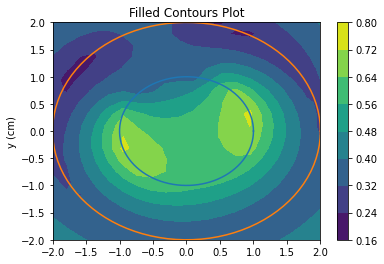

In [22]:
xxx = np.linspace(0, 2*np.pi, 100)
yyy = np.linspace(0, 2*np.pi, 100)


xxxx=np.linspace(-2, 2, 100)
zzzz=np.linspace(0, 2, 100)
Xc, Zc=np.meshgrid(xxxx, zzzz)
Yc = np.sqrt(1-Xc**2)


a_ = -2
b_ = 2
n_ = 20

x = np.linspace(a_, b_, n_)
y = np.linspace(a_, b_, n_)
xx, yy = np.meshgrid(x, y)

u_approx([0, 0])

zz = np.zeros([n_, n_])

for i, x_ in enumerate(x):
    for j, y_ in enumerate(y):
        zz[i][j] = u_approx([x[i], y[j]])
        
fig_contour,ax=plt.subplots(1,1)

ax.plot(x1(xxx)[0], x1(xxx)[1])
ax.plot(x2(xxx)[0], x2(xxx)[1])


cp = ax.contourf(xx, yy, zz)
fig_contour.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

<IPython.core.display.Javascript object>


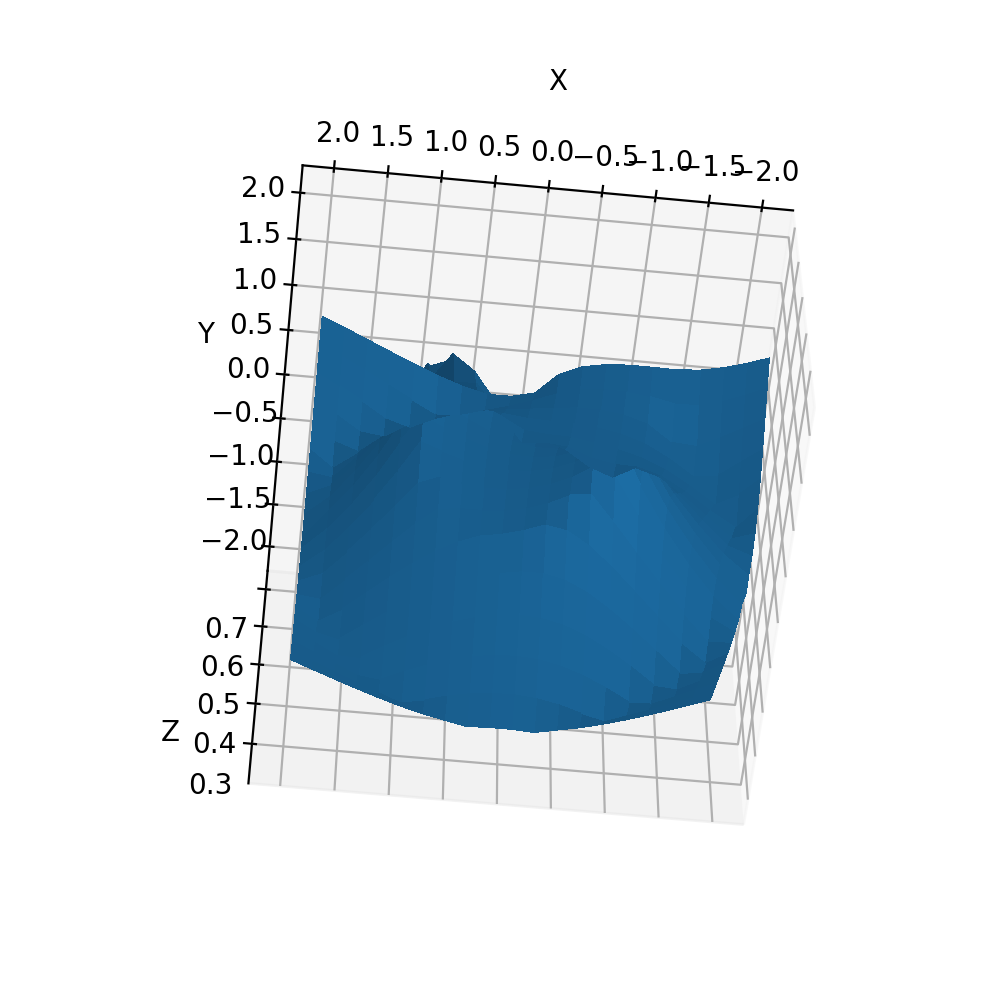

In [23]:
%matplotlib notebook

fig = plt.figure(figsize=(5, 5))
ax = fig.gca(projection='3d')

# surf = ax.plot_wireframe(xx, yy, zz, rstride=1, cstride=1)

#fig.colorbar(surf, shrink=0.5, aspect=10)
surf = ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, linewidth=0, antialiased=False)


rstride = 10
cstride = 10
# ax.plot_surface(Xc, Yc, Zc, alpha=0.8, rstride=rstride, cstride=cstride)
# ax.plot_surface(Xc, -Yc, Zc, alpha=0.8, rstride=rstride, cstride=cstride)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

In [24]:
# TODO перевірити базис Гамма